## **Maestría en Inteligencia Artificial Aplicada**
### **Curso: ADVANCE MACHINE LEARNING METHODS**
## Tecnológico de Monterrey
### Dr. José Antonio Cantoral Ceballos

## Activity Week 4
### **Implementing a FC for ASL Dataset Using PyTorch.**

*   Roberto Romero Vielma - A00822314


# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks using PyTorch
<br>

#### Activity 2a: Implementing a FC for ASL Dataset using PyTorch
<br>


- Objective

    The primary aim of this activity is to transition from using Numpy for network implementation to utilizing PyTorch, a powerful deep learning framework. You will be replicating the work you did for the ASL dataset in Activity 1b, but this time, you'll implement a your multi layer FC model using PyTorch.
    
- Instructions

    Review Previous Work: Begin by reviewing your Numpy-based Fully Connected Network for the ASL dataset from Activity 1b. Note the architecture, hyperparameters, and performance metrics for comparison.

    Introduce PyTorch: If you're new to PyTorch, take some time to familiarize yourself with its basic operations and syntax. You can consult the official documentation or follow online tutorials.

    Prepare the ASL Dataset: As before, download and preprocess the Kaggle ASL dataset. 

    Implement the Network: Design your network architecture tailored for the ASL dataset. Pay special attention to PyTorch modules like nn.Linear() and nn.ReLU().

    Train the Model: Implement the training loop, making use of PyTorch's autograd to handle backpropagation. Monitor metrics like loss and accuracy as the model trains.

    Analyze and Document: In Markdown cells, discuss the architecture choices, any differences in performance between the Numpy and PyTorch implementations, and insights gained from using a deep learning framework like PyTorch.

In [1]:
# Import the numpy library and give it the alias 'np'
import numpy as np

# Import the 'string' module for string-related operations
import string

# Import the 'pandas' library and give it the alias 'pd' for data manipulation
import pandas as pd

# Import the 'matplotlib.pyplot' module and give it the alias 'plt' for data visualization
import matplotlib.pyplot as plt

# Import the 'os' module for interacting with the operating system
import os

# Set the matplotlib backend to 'inline' for Jupyter Notebook or IPython
%matplotlib inline

# Import the 'torch' library for deep learning
import torch

# Import modules for defining neural network architectures (nn) and applying activation functions (F)
import torch.nn as nn
import torch.nn.functional as F







In [2]:
# Define a variable named 'DATA_PATH' and set it to the path of the data directory.
DATA_PATH = './asl_data/'

# Read the training data from a CSV file into a Pandas DataFrame.
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))

# Read the validation data from a CSV file into a Pandas DataFrame.
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

### Always a good idea to explore the data

In [3]:
# Display the first 5 rows of the 'train_df' DataFrame
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Get training label data

In [4]:
# Extract the 'label' column from the 'train_df' DataFrame and convert it to a NumPy array.
y_train = np.array(train_df['label'])

# Extract the 'label' column from the 'valid_df' DataFrame and convert it to a NumPy array.
y_val = np.array(valid_df['label'])

# Delete the 'label' column from the 'train_df' DataFrame.
del train_df['label']

# Delete the 'label' column from the 'valid_df' DataFrame.
del valid_df['label']

# Extract the remaining data from 'train_df' as a NumPy array and convert it to float32 data type.
x_train = train_df.values.astype(np.float32)

# Extract the remaining data from 'valid_df' as a NumPy array and convert it to float32 data type.
x_val = valid_df.values.astype(np.float32)

In [7]:
# Print the shape (dimensions) of the 'x_train' NumPy array
print(x_train.shape)
# Print the shape (dimensions) of the 'y_train' NumPy array
print(y_train.shape)

(27455, 784)
(27455,)


In [8]:
# Print the shape (dimensions) of the 'x_val' NumPy array and the 'y_val' NumPy array
print(x_val.shape, y_val.shape)

(7172, 784) (7172,)


### `split_val_test` Function Explanation

The `split_val_test` function is a Python utility designed to split a dataset into two distinct sets: a validation set and a test set. This function is useful for various machine learning and deep learning tasks, where you need to assess the model's performance on data that it hasn't seen during training.

### Parameters
- `x`: Feature data (NumPy array or tensor).
- `y`: Target labels (NumPy array or tensor).
- `pct`: The percentage of data to allocate to the validation set (default is 50%).
- `shuffle`: A boolean flag indicating whether the data should be shuffled before splitting (default is True).

### Functionality
1. **Data Consistency Check**: The function begins by checking if the number of samples in the feature data `x` matches the number of samples in the target labels `y`. This ensures that the data is consistent.

2. **Shuffling (Optional)**: If the `shuffle` flag is set to `True`, the function shuffles the data. It does this by creating an array of indices corresponding to the samples, shuffling these indices randomly, and then reordering both the feature data and target labels based on the shuffled indices. This step is typically used to randomize the data order for training and evaluation.

3. **Data Splitting**: The function then splits the data into two parts based on the specified percentage `pct`. The first part, referred to as the validation set, contains a portion of the data, and the second part, the test set, contains the remaining data. The split is performed along the first dimension (rows).

4. **Return Values**: The function returns the following as a tuple:
   - `x_val`: The feature data of the validation set.
   - `y_val`: The target labels of the validation set.
   - `x_test`: The feature data of the test set.
   - `y_test`: The target labels of the test set.

In [10]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    # Check if the number of samples in 'x' matches the number of samples in 'y'
    assert x.shape[0] == y.shape[0], 'Number of samples x != number samples y'

    # Get the total number of samples
    total_samples = x.shape[0]

    # If 'shuffle' is True, randomly shuffle the data
    if shuffle:
        # Create an array of indices from 0 to the number of samples
        idxs = np.arange(x.shape[0])

        # Shuffle the array of indices randomly
        np.random.shuffle(idxs)

        # Reorder the data based on the shuffled indices
        x = x[idxs]
        y = y[idxs]

    # Split the data into two parts based on 'pct' (percentage)
    # The first part is for the validation set, and the second part is for the test set
    x_val = x[:int(total_samples * pct), :]
    y_val = y[:int(total_samples * pct)]
    x_test = x[int(total_samples * pct):, :]
    y_test = y[int(total_samples * pct):]

    # Return the validation and test sets as tuples
    return x_val, y_val, x_test, y_test
        

In [11]:
# Call the split_val_test function to split the validation data into validation and test sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [13]:
# Determine the data type of the variable 'y_val'
type(y_val)

numpy.ndarray

In [14]:
# Print the shape (dimensions) of the 'x_val' NumPy array and the 'y_val' NumPy array
print(x_val.shape, y_val.shape)
# Print the shape (dimensions) of the 'x_test' NumPy array and the 'y_test' NumPy array
print(x_test.shape, y_test.shape)

(3586, 784) (3586,)
(3586, 784) (3586,)


In [15]:
# Create a list 'alphabet' containing all lowercase letters from 'a' to 'z'
alphabet = list(string.ascii_lowercase)

# Remove the letter 'j' from the list
alphabet.remove('j')

# Remove the letter 'z' from the list
alphabet.remove('z')

# Print the length (number of elements) of the 'alphabet' list
print(len(alphabet))

24


### Normalise the data

### `normalise` Function Explanation

The `normalise` function is a Python utility designed to normalize data by subtracting the mean and dividing by the standard deviation. This normalization process is commonly used in data preprocessing, especially in machine learning and deep learning, to transform data into a standard scale. The function takes the mean and standard deviation as inputs and applies normalization to a given dataset.

### Parameters
- `x_mean`: The mean value used for normalization.
- `x_std`: The standard deviation value used for normalization.
- `x_data`: The data to be normalized.

### Functionality
The function performs the following steps:
1. **Normalization**: It calculates the normalized data by subtracting the mean (`x_mean`) from each data point and then dividing by the standard deviation (`x_std`). The result is that the data is scaled so that it has a mean of 0 and a standard deviation of 1.

2. **Return Values**: The normalized data is returned as the output of the function. This normalized data is suitable for use in various machine learning algorithms, as it can improve model training and convergence.

In [16]:
def normalise(x_mean, x_std, x_data):
    # Calculate the normalized data by subtracting the mean and dividing by the standard deviation
    normalized_data = (x_data - x_mean) / x_std

    # Return the normalized data
    return normalized_data

In [17]:
# Calculate the mean of 'x_train'
x_mean = x_train.mean()

# Calculate the standard deviation of 'x_train'
x_std = x_train.std()

# Normalize 'x_train' using the calculated mean and standard deviation
x_train = normalise(x_mean, x_std, x_train)

# Normalize 'x_val' using the same mean and standard deviation as 'x_train'
x_val = normalise(x_mean, x_std, x_val)

# Normalize 'x_test' using the same mean and standard deviation as 'x_train'
x_test = normalise(x_mean, x_std, x_test)

In [18]:
# Calculate the mean of the 'x_train' data
x_train.mean()

3.6268384e-06

### `normalise` Function Explanation

The `normalise` function is a Python utility designed to normalize data by subtracting the mean and dividing by the standard deviation. This normalization process is commonly used in data preprocessing, especially in machine learning and deep learning, to transform data into a standard scale. The function takes the mean and standard deviation as inputs and applies normalization to a given dataset.

### Parameters
- `x_mean`: The mean value used for normalization.
- `x_std`: The standard deviation value used for normalization.
- `x_data`: The data to be normalized.

### Functionality
The function performs the following steps:
1. **Normalization**: It calculates the normalized data by subtracting the mean (`x_mean`) from each data point and then dividing by the standard deviation (`x_std`). The result is that the data is scaled so that it has a mean of 0 and a standard deviation of 1.


In [19]:
def plot_number(image):
    # Create a figure for the plot with a specified size (5x5 inches)
    plt.figure(figsize=(5, 5))

    # Display the image using the 'imshow' function with a grayscale colormap
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))

    # Turn off axis labels and ticks
    plt.axis('off')

    # Show the plot
    plt.show()

In [20]:
# Determine the data type of the variable 'x_val'
type(x_val)

numpy.ndarray

La imagen muestreada representa un: p


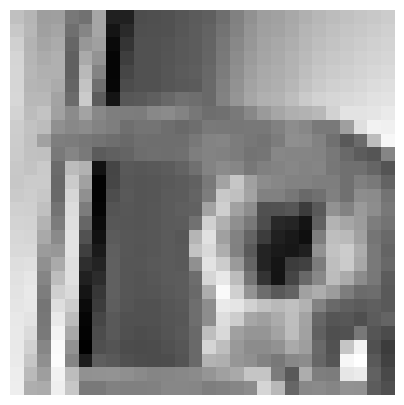

In [21]:
# Generate a random index within the range of 'y_val'
rnd_idx = np.random.randint(len(y_val))

# Uncomment these lines if you want to print the index and the associated label
# print(rnd_idx)
# print(y_val[rnd_idx])

# Access the label at 'rnd_idx' and use it to look up the corresponding letter in the 'alphabet' list
print(f'La imagen muestreada representa un: {alphabet[y_val[rnd_idx]]}')

# Use the 'plot_number' function to display the image at index 'rnd_idx', reshaping it to 28x28 pixels
plot_number(x_val[rnd_idx].reshape(28, 28))

### The model

$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Create minibatches

### `create_minibatches` Function Explanation

The `create_minibatches` function is a Python utility designed for creating minibatches from a dataset. Minibatches are smaller subsets of a larger dataset, often used in machine learning and deep learning to facilitate training and processing of large amounts of data.

### Parameters
- `mb_size`: The size of each minibatch (number of samples per minibatch).
- `x`: The feature data.
- `y`: The target labels.
- `shuffle`: A boolean flag indicating whether to shuffle the data (default is True).

### Functionality
The function performs the following steps:

1. **Data Consistency Check**: It checks whether the number of samples in the feature data `x` matches the number of samples in the target labels `y`. This is important to ensure that the data is consistent and can be processed correctly.

2. **Shuffling (Optional)**: If the `shuffle` flag is set to `True`, the function randomly shuffles the data. It does this by creating an array of indices corresponding to the data samples, shuffling these indices randomly, and then reordering both the feature data and target labels based on the shuffled indices. Shuffling helps randomize the data order, which can be beneficial during training.

3. **Minibatch Creation**: The function creates minibatches by iterating through the data. It starts at the beginning of the data and selects `mb_size` samples at a time. These minibatches are formed by extracting subsets of the data, with each minibatch containing a specified number of samples.

4. **Return Value**: The function returns an iterator that generates minibatches. Each minibatch is a tuple containing the feature data and corresponding target labels.


In [22]:
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    # Check if the number of samples in 'x' matches the number of samples in 'y'
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'

    # Get the total number of data samples
    total_data = x.shape[0]

    # If 'shuffle' is True, shuffle the data
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    # Create and return minibatches by iterating through the data
    return ((x[i:i + mb_size], y[i:i + mb_size]) for i in range(0, total_data, mb_size))

In [23]:
# Iterate through minibatches created by the 'create_minibatches' function
for i, (x, y) in enumerate(create_minibatches(128, x_train, y_train)):
    # Print the index 'i'
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214


### Now the PyTorch part

In [24]:
# Convert the NumPy arrays 'x_train' and 'y_train' into PyTorch tensors
x_train_tensor = torch.tensor(x_train.copy())
y_train_tensor = torch.tensor(y_train.copy())

# Convert the NumPy arrays 'x_val' and 'y_val' into PyTorch tensors
x_val_tensor = torch.tensor(x_val.copy())
y_val_tensor = torch.tensor(y_val.copy())

# Convert the NumPy arrays 'x_test' and 'y_test' into PyTorch tensors
x_test_tensor = torch.tensor(x_test.copy())
y_test_tensor = torch.tensor(y_test.copy())

In [25]:
# Check if a CUDA-enabled GPU is available; if not, use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Print the selected device ('cuda' for GPU or 'cpu' for CPU)
print(device)

cuda


### Accuracy

### `accuracy` Function Explanation

The `accuracy` function is a Python utility designed to evaluate the performance of a machine learning or deep learning model on a given dataset. It calculates the model's accuracy and average cost on the dataset, making it a valuable tool for model evaluation.

### Function Parameters
- `model`: The machine learning or deep learning model to evaluate.
- `x`: Feature data for the dataset.
- `y`: Target labels for the dataset.
- `mb_size`: The size of each minibatch (number of samples per minibatch).

### Functionality
The `accuracy` function performs the following tasks:

1. **Initialization**: It initializes variables to keep track of the number of correct predictions (`num_correct`), the total number of predictions (`num_total`), and a cost accumulator (`cost`).

2. **Model Evaluation Mode**: The function sets the model to evaluation mode using `model.eval()`. In this mode, dropout and batch normalization layers are disabled to ensure consistent evaluation.

3. **Device Selection**: It moves the model to the specified device (either GPU or CPU) using `model.to(device=device)`.

4. **Gradient Computation Disabling**: To improve performance during evaluation, the function uses `with torch.no_grad()` to disable gradient computation. This is especially helpful when gradients are not needed for evaluation.

5. **Minibatch Iteration**: The function iterates through minibatches created by a generator function (presumably named `create_minibatches`). For each minibatch, the following steps are performed:
   - The feature data and target labels are moved to the specified device with appropriate data types.
   - Model scores are computed for the minibatch.
   - The cross-entropy loss for the minibatch is computed and accumulated in the `cost` variable.
   - The predicted class (with the highest score) is determined for each data point in the minibatch.
   - The number of correct predictions in the minibatch is counted.
   - The total number of predictions is incremented.

6. **Results**: The function returns the average cost per minibatch and the accuracy as a tuple.


In [26]:
def accuracy(model, x, y, mb_size):
    # Initialize variables to count the number of correct predictions and the total number of predictions
    num_correct = 0
    num_total = 0

    # Initialize a variable to accumulate the cost
    cost = 0.

    # Set the model to evaluation mode
    model.eval()

    # Move the model to the specified device (GPU or CPU)
    model = model.to(device=device)

    # Disable gradient computation for better performance
    with torch.no_grad():
        # Iterate through minibatches created by 'create_minibatches'
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x, y), 1):
            # Move the minibatch data to the specified device with the appropriate data types
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Compute model scores for the minibatch
            scores = model(xi)

            # Compute the cross-entropy loss for the minibatch and accumulate it in the cost
            cost += (F.cross_entropy(scores, yi)).item()

            # Find the predicted class (with the highest score) for each data point in the minibatch
            _, pred = scores.max(dim=1)  # pred shape (mb_size)

            # Count the number of correct predictions in the minibatch
            num_correct += (pred == yi.squeeze()).sum()  # pred shape (mb_size), yi shape (mb_size, 1)

            # Increment the total number of predictions
            num_total += pred.size(0)

    # Return the average cost per minibatch and the accuracy
    return cost / mb, float(num_correct) / num_total

### Training Loop

### `train` Function Explanation

The `train` function is a Python utility designed to train a machine learning or deep learning model over a specified number of epochs. It is a fundamental part of the training process and is responsible for updating the model's parameters based on the training data.

### Function Parameters
- `model`: The machine learning or deep learning model to be trained.
- `optimiser`: The optimization algorithm responsible for updating model parameters.
- `mb_size`: The size of each minibatch (number of samples per minibatch).
- `epochs`: The number of training epochs (default is 100).

### Functionality
The `train` function carries out the following tasks:

1. **Model Device Placement**: It moves the model to the specified device (either GPU or CPU) using `model.to(device=device)`. This ensures that all model operations and computations are performed on the selected hardware.

2. **Training Loop**: The function enters a loop that iterates over the specified number of training epochs. For each epoch, it performs the following steps:

   - **Initialization**: Variables are initialized to keep track of the number of correct predictions (`train_correct_num`), the total number of predictions (`train_total`), and an accumulator for the training cost (`train_cost_acum`).

   - **Minibatch Iteration**: The function iterates through minibatches created by a generator function (presumably named `create_minibatches`). For each minibatch, it follows these steps:
   
     - **Training Mode**: The model is set to training mode using `model.train()`. This ensures that operations like dropout and batch normalization layers are active for training.

     - **Data Preparation**: The feature data and target labels in the minibatch are moved to the specified device with appropriate data types.

     - **Model Forward Pass**: The model computes scores (predictions) for the minibatch.

     - **Loss Calculation**: The cross-entropy loss is calculated for the minibatch.

     - **Gradient Computation and Model Parameter Update**: The function performs the following steps to update the model parameters:
       - Zeroes the gradients using `optimiser.zero_grad()`.
       - Backpropagates the loss using `cost.backward()`.
       - Updates the model parameters using `optimiser.step()`.

     - **Counting Correct Predictions**: The number of correct predictions in the minibatch is counted.

     - **Tracking Training Data Metrics**: Metrics such as training accuracy, total training samples, and training cost are updated for the epoch.

   - **Validation Evaluation**: After each epoch, the function calculates the validation cost and accuracy using the `accuracy` function. This provides insights into the model's performance on a separate validation dataset.

   - **Print Training Progress**: The function prints training progress information at specific intervals (e.g., every 20 epochs). This information includes the current epoch, training cost, validation cost, training accuracy, validation accuracy, and the current learning rate.


In [27]:
def train(model, optimiser, mb_size, epochs=100):
    # Move the model to the specified device (GPU or CPU)
    model = model.to(device=device)

    for epoch in range(epochs):
        train_correct_num = 0.
        train_total = 0.
        train_cost_acum = 0

        # Iterate through minibatches for training data
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x_train_tensor, y_train_tensor), 1):
            # Set the model to training mode
            model.train()

            # Move the minibatch data to the specified device with the appropriate data types
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Compute model scores for the minibatch
            scores = model(xi)

            # Calculate the cross-entropy loss
            cost = F.cross_entropy(input=scores, target=yi.squeeze())

            # Zero the gradients, backpropagate the cost, and update model parameters
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            # Count the number of correct predictions in the minibatch
            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum()
            train_total += scores.size(0)
            train_cost_acum += cost.item()

        # Calculate validation cost and accuracy using the 'accuracy' function
        val_cost, val_acc = accuracy(model, x_val_tensor, y_val_tensor, mb_size)

        # Calculate training accuracy and cost
        train_acc = float(train_correct_num) / train_total
        train_cost = train_cost_acum / mb

        # Print training progress information (e.g., every 20 epochs)
        if epoch % 20 == 0:
            print(f'Epoch: {epoch}, train cost: {train_cost:.6f}, val cost: {val_cost:.6f},'
                  f' train acc: {train_acc:.4f}, val acc: {val_acc:.4f},'
                  f' lr: {optimiser.param_groups[0]["lr"]:.6f}')

### Model using Sequential

### Neural Network Architectural Choices

In the following code, we define and train a neural network for a classification problem, incorporating specific hyperparameters and architectural choices.

### Hyperparameters

- `hidden`: We set `hidden` to 200, which determines the number of hidden units in the neural network. This choice affects the model's capacity and its ability to capture complex patterns.

- `lr`: The learning rate (`lr`) is set to 1e-3 (0.001). This parameter is crucial as it influences the step size during optimization, affecting the training process's convergence and stability.

- `epochs`: We specify `epochs` as 100, determining the number of training epochs. This controls how many times the entire training dataset is passed forward and backward through the network.

- `mb_size`: The mini-batch size (`mb_size`) is chosen to be 128, impacting the number of data samples processed in each forward and backward pass during training.

### Neural Network Model

- `model1`: An instance of the neural network model is created using PyTorch's `nn.Sequential` container. This model comprises the following layers:
    - `nn.Linear`: The input layer with 784 features and 'hidden' (200) hidden units. It's a fully connected layer.
    - `nn.Dropout`: A dropout layer is added for regularization to prevent overfitting during training.
    - `nn.ReLU`: The Rectified Linear Unit (ReLU) activation function is employed to introduce non-linearity.
    - `nn.Linear`: The output layer is configured with 24 output classes, suitable for a multi-class classification problem.

### Optimizer

- `optimiser`: We choose the Adam optimizer to optimize the neural network's parameters during training. We set the learning rate (`lr`) to 1e-3 (0.001), and weight decay is specified as 1e-4 (0.0001) to control the optimization process. Weight decay helps prevent overfitting by adding L2 regularization to the optimizer.

### Learning Rate Scheduler

- `scheduler`: A One Cycle Learning Rate Scheduler is utilized to dynamically adjust the learning rate during training. This scheduler can potentially improve convergence and prevent divergence. We specify the maximum learning rate as 0.1 and set the number of training epochs as 100.

### Training

- The neural network model is trained using the `train` function, which leverages the defined optimizer and these specific hyperparameters.

These architectural choices collectively define the structure and training process of the neural network for the classification task, incorporating the provided hyperparameter values. Customizing these choices can significantly impact the model's performance and training behavior, depending on the specific problem and dataset.



In [28]:
# Define hyperparameters
hidden = 200  # Number of hidden units in the neural network
lr = 1e-3  # Learning rate for the optimizer
epochs = 100  # Number of training epochs
mb_size = 128  # Minibatch size

# Create a neural network model
model1 = nn.Sequential(
    nn.Linear(in_features=784, out_features=hidden),  # Input layer with 784 features and 'hidden' hidden units
    nn.Dropout(),  # Dropout layer for regularization
    nn.ReLU(),  # ReLU activation function
    nn.Linear(in_features=hidden, out_features=24)  # Output layer with 24 classes (classification problem)
)

# Choose an optimizer (Adam) and set learning rate and weight decay
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)

# Define a learning rate scheduler (One Cycle Learning Rate Scheduler)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

# Train the neural network model using the 'train' function
train(model1, optimiser, mb_size, epochs)

Epoch: 0, train cost: 0.878369, val cost: 0.744949, train acc: 0.7220, val acc: 0.7780, lr: 0.004000
Epoch: 20, train cost: 0.189577, val cost: 2.392642, train acc: 0.9588, val acc: 0.7987, lr: 0.004000
Epoch: 40, train cost: 0.174906, val cost: 2.895980, train acc: 0.9662, val acc: 0.7708, lr: 0.004000
Epoch: 60, train cost: 0.145940, val cost: 3.027805, train acc: 0.9705, val acc: 0.8101, lr: 0.004000
Epoch: 80, train cost: 0.157205, val cost: 3.350077, train acc: 0.9702, val acc: 0.7764, lr: 0.004000


In [31]:
# Calculate and retrieve the accuracy of the trained neural network model 'model1'
# on the test dataset ('x_test_tensor' and 'y_test_tensor') using the specified minibatch size ('mb_size').
# The 'accuracy' function returns a tuple, and '[1]' is used to access the second element of the tuple, which is the accuracy value.
accuracy_value = accuracy(model1, x_test_tensor, y_test_tensor, mb_size)[1]
# Print the accuracy value
print(accuracy_value)

0.8078639152258784


### `predict` Function Explanation

The `predict` function is a Python utility designed to make predictions using a trained machine learning or deep learning model. Given input data `x`, it computes predictions using the model and returns the predicted class for each data point.

### Function Parameters
- `x`: The input data for which predictions are to be made.
- `model`: The machine learning or deep learning model used for making predictions.

### Functionality
The `predict` function carries out the following tasks:

1. **Data Device Placement**: It moves the input data `x` to the specified device (either GPU or CPU) using `x.to(device=device, dtype=torch.float32)`. This ensures that the input data is in the appropriate format and on the chosen hardware for model computation.

2. **Model Prediction**: The function computes model scores for the input data `x`. The assumption is made that the model's output is a set of scores for each of the possible classes, with the shape of `(mb_size, 10)` (indicating 10 classes).

3. **Determining Predicted Class**: For each data point, the function identifies the predicted class by selecting the class with the highest score. This is achieved using `scores.max(dim=1)`, and the resulting array `pred` contains the predicted class for each data point. The shape of `pred` is `(mb_size)`.

4. **Return Values**: The function returns the predicted class for each data point in the input data `x`.


In [32]:
def predict(x, model):
    # Move the input data 'x' to the specified device (GPU or CPU) with the appropriate data type
    x = x.to(device=device, dtype=torch.float32)
    
    # Compute model scores for the input data 'x'
    scores = model(x)  # Assumes the model outputs scores for 10 classes, so the shape is (mb_size, 10)

    # Find the predicted class (with the highest score) for each data point
    _, pred = scores.max(dim=1)  # 'pred' shape: (mb_size)

    # Return the predicted class for each data point
    return pred

La imagen muestreada representa un: b


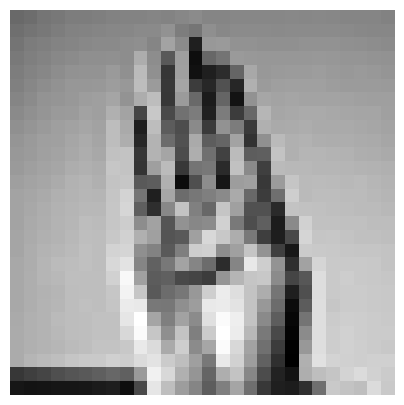

el valor predicho b


In [34]:
# Generate a random index within the range of the test dataset
rnd_idx = np.random.randint(len(y_test))

# Print the ground truth label for the randomly selected image
print(f'La imagen muestreada representa un: {alphabet[y_test[rnd_idx]]}')

# Display the selected image
plot_number(x_test[rnd_idx].reshape(28, 28))

# Make a prediction using the 'predict' function for the selected image
pred = predict(x_test_tensor[rnd_idx].reshape(1, -1), model1)

# Print the predicted label based on the model's prediction
print(f'el valor predicho {alphabet[pred]}')

### **Performance Differences: NumPy vs. PyTorch**
NumPy and PyTorch exhibit notable performance differences:

1. **Speed and Efficiency:**
PyTorch, optimized for GPU acceleration, surpasses NumPy in matrix operations and overall training speed. This advantage is crucial for deep learning tasks involving large matrices.

2. **Automatic Differentiation:**
PyTorch's automatic differentiation simplifies gradient computation for backpropagation. NumPy requires manual gradient computation, which can be error-prone and time-consuming.

3. **GPU Support:**
PyTorch seamlessly integrates with GPUs, enabling efficient parallel computation. This GPU support boosts performance, while NumPy primarily relies on CPU computation.

4. **Deep Learning Building Blocks:**
PyTorch provides a wide range of pre-defined layers, loss functions, and optimization algorithms tailored for deep learning, making neural network implementation more intuitive. NumPy often requires implementing these components from scratch or relying on third-party libraries.

5. **Community and Ecosystem:**
PyTorch benefits from a vibrant community and a rich ecosystem, including pre-trained models, libraries, and tutorials. This extensive support expedites development and problem-solving. While NumPy is powerful, it may have fewer specialized deep learning resources.

### **Insights Gained from Using PyTorch**
Using PyTorch for deep learning tasks has provided valuable insights and advantages:

1. **Dynamic Computational Graphs:**
PyTorch employs dynamic computational graphs, allowing for model architecture flexibility. This is particularly useful when working with variable-length sequences or dynamic structures, as the graph is built on-the-fly.

2. **Debugging and Visualization:**
PyTorch offers excellent debugging and visualization tools. Intermediate values, gradients, and tensors can be inspected during training, facilitating issue diagnosis and model behavior understanding.

3. **Transfer Learning and Pre-trained Models:**
PyTorch provides access to pre-trained deep learning models, which can be fine-tuned for specific tasks. This accelerates development by leveraging models trained on extensive datasets, such as ImageNet, and adapting them to new problems.

4. **Community and Research Integration:**
PyTorch is widely adopted in both industry and research, keeping users connected with the latest advancements and research findings in deep learning. This integration with the research community provides updates and collaboration opportunities.

5. **Scalability and Deployment:**
PyTorch offers solutions for scaling deep learning models to distributed systems and deploying them in production environments. These insights are crucial when transitioning from prototyping to real-world applications.

In conclusion, PyTorch's performance advantages, automatic differentiation, GPU support, and deep learning-focused ecosystem make it a powerful choice for deep learning tasks. The insights gained extend beyond performance improvements and encompass enhanced development, debugging, and integration with cutting-edge research.